# **Change in Economic Output in Asia Visualization**
# 1. Introduction
This is an analysis of Asia's GDP per capita over time. GDP is seen as a monetary measure for standards of living. Over the years, Asia has become a driving force in the world. With the discovery of Oil, the rise of K-culture, Bollywood, and fashion, Asia has become a significant cultural and economic driving force. However, the economic progress of its countries and regions have been diverse and scattered. The purpose of this notebook is to visualize the change in economic output in Asia compared to that of the rest of the world.

# 2. Importing Libraries, Downloading Datset, Reading Data

In [177]:
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import matplotlib
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [178]:
pip install mapclassify

In [153]:
pip install -q kaggle

In [154]:
from google.colab import files
files.upload()

{}

In [155]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d psycon/world-development-indicators
! unzip world-development-indicators.zip && rm world-development-indicators.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
 99% 316M/319M [00:02<00:00, 145MB/s]
100% 319M/319M [00:02<00:00, 127MB/s]
Archive:  world-development-indicators.zip
replace WDICountry-Series.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [156]:
df = pd.read_csv('/content/WDIData.csv')
geo = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

The 'geo' dataset includes useful geographical data

# 3. Data Processing

## 3.1 Geographic Data & Economic Data

In [182]:
#Geographic Data
geo = geo.rename(columns = {'name':'country'})
geo.head(6)

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."


In [183]:
#Economic data, Extracting data related to GDP  per capita
gdp_percap = df[df['Indicator Code'] == 'NY.GDP.PCAP.CD'] #Using the indicator code from 'df' to get ONLY the gdp per capita
gdp_percap = gdp_percap.rename(columns={'Country Code':'iso_a3'}) #iso_a3 is a 3 letter code to represent countries, dependent territories, and special areas of geographical interest
#Reading top of data
gdp_percap.head(6)

,Country Name,iso_a3,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
474,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,162.726325,162.555968,172.271022,199.784916,180.228774,199.517228,...,1748.905594,1736.242220,1556.316469,1446.533624,1629.404273,1541.031661,1511.309259,1360.878645,1557.722682,NaN
1916,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.930722,113.080062,118.829461,123.441089,131.852423,138.524029,...,2157.494584,2212.914095,1894.322115,1673.843681,1613.490478,1704.135698,1777.852822,1709.764129,1774.921218,NaN
3358,Arab World,ARB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7465.455471,7414.312109,6359.900578,6177.227235,6272.949782,6635.381394,6562.969998,5724.286870,6412.389210,NaN
4800,Caribbean small states,CSS,GDP per capita (current US$),NY.GDP.PCAP.CD,448.256417,476.901484,494.736372,516.739524,547.950527,580.944136,...,10321.240322,10402.313666,10181.806157,9557.667766,9915.744684,10250.291732,10406.670710,8857.870922,9352.282028,NaN
6242,Central Europe and the Baltics,CEB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,13718.183999,14164.074449,12522.661057,12831.409937,14254.738102,16047.279700,16346.561806,16197.299349,18568.993385,NaN
7684,Early-demographic dividend,EAR,GDP per capita (current US$),NY.GDP.PCAP.CD,161.165351,158.406567,159.405809,165.129626,184.658198,195.244645,...,3389.953910,3457.598489,3244.237034,3303.710575,3521.381645,3509.754222,3538.833413,3253.713456,3739.957790,NaN


In [184]:
#Reading bottom of extracted data
gdp_percap.tail(6)

,Country Name,iso_a3,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
375394,Vietnam,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2354.874117,2545.416768,2581.622442,2745.565588,2974.117229,3230.927713,3425.089253,3526.274579,3694.019046,NaN
376836,Virgin Islands (U.S.),VIR,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,34597.976694,33045.364380,34007.352941,35324.974887,35365.069304,36653.863048,38596.030712,39552.168595,NaN,NaN
378278,West Bank and Gaza,PSE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3315.297539,3352.112595,3272.154324,3527.613824,3620.360487,3562.330943,3656.858271,3233.568638,3663.969055,NaN
379720,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1607.152173,1674.002572,1601.807163,1152.738019,964.340344,758.145949,750.554583,631.681490,690.759273,NaN
381162,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,...,1878.346811,1762.427817,1338.290927,1280.806543,1535.196574,1516.368371,1305.001031,985.132436,1120.630171,NaN
382604,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,278.813847,280.828663,276.688233,277.479715,281.558896,293.308788,...,1429.998461,1434.896277,1445.069702,1464.588957,1235.189032,1254.642265,1316.740657,1214.509820,1737.173977,NaN


## 3.2 Combining, Cleaning, & Transforming Geography and Economic Data

In [185]:
#Merging Geography and Economic Data based off iso code
asia_gdp = gdp_percap.merge(geo, how='left',on=['iso_a3'])
asia_gdp.tail(3)

,Country Name,iso_a3,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2018,2019,2020,2021,Unnamed: 66,pop_est,continent,country,gdp_md_est,geometry
263,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,758.145949,750.554583,631.681490,690.759273,NaN,29161922.0,Asia,Yemen,22581.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
264,Zambia,ZMB,GDP per capita (current US$),NY.GDP.PCAP.CD,232.188564,220.042067,212.578449,213.896759,242.384473,303.281740,...,1516.368371,1305.001031,985.132436,1120.630171,NaN,17861030.0,Africa,Zambia,23309.0,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."
265,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,278.813847,280.828663,276.688233,277.479715,281.558896,293.308788,...,1254.642265,1316.740657,1214.509820,1737.173977,NaN,14645468.0,Africa,Zimbabwe,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [186]:
#Extracting Data from Asian continent
gdp = asia_gdp[asia_gdp['continent'] == 'Asia']
gdp = gdp.reset_index(drop=True)
gdp.tail(6)

,Country Name,iso_a3,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2018,2019,2020,2021,Unnamed: 66,pop_est,continent,country,gdp_md_est,geometry
39,Turkmenistan,TKM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6967.375043,7612.035180,NaN,NaN,NaN,5942089.0,Asia,Turkmenistan,40761.0,"POLYGON ((52.50246 41.78332, 52.94429 42.11603..."
40,United Arab Emirates,ARE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,43839.324486,42701.443045,36284.555243,NaN,NaN,9770529.0,Asia,United Arab Emirates,421142.0,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
41,Uzbekistan,UZB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1597.068337,1784.009816,1749.655815,1983.064723,NaN,33580650.0,Asia,Uzbekistan,57921.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
42,Vietnam,VNM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3230.927713,3425.089253,3526.274579,3694.019046,NaN,96462106.0,Asia,Vietnam,261921.0,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
43,West Bank and Gaza,PSE,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3562.330943,3656.858271,3233.568638,3663.969055,NaN,4685306.0,Asia,Palestine,16276.0,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
44,"Yemen, Rep.",YEM,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,758.145949,750.554583,631.681490,690.759273,NaN,29161922.0,Asia,Yemen,22581.0,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."


## 3.3 GDP Per Capita as a Percentage of World GDP Per Capita

In [187]:
#Dropping non-numerical columns to get percentage of World GDP per capita
gdp_values=gdp.drop(['iso_a3', 'Indicator Name','Indicator Code','Country Name', 'country', 'pop_est','continent','iso_a3','gdp_md_est','geometry','Unnamed: 66'], axis=1)
gdp_values.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,129.329760,...,638.845852,624.315455,614.223342,556.007221,512.012778,516.679862,485.668419,494.179350,516.747871,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3681.844691,3838.173880,3986.231624,3607.289299,3591.828052,3914.527854,4220.540321,4604.646324,4266.018074,4670.008798
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7496.294648,7875.756953,7891.313147,5500.310382,3880.738731,4147.089716,4739.841710,4805.753718,4229.910649,5384.034998
3,89.035239,97.595292,100.122130,101.901413,100.221104,106.646644,112.665365,122.870628,122.847598,135.147381,...,883.117130,981.860851,1118.873808,1248.453310,1678.953230,1839.583378,1991.483267,2154.226819,2270.347535,2503.043880
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2538.949519,2472.724753,2652.225654,2752.630172,2930.574923,3286.596744,3243.477437,3322.863329,3000.777986,NaN


In [188]:
#Extracting World GDP per capita to obtain percentage of World GDP per capita
world = gdp_percap[gdp_percap['Country Name']=='World']
world = world.reset_index(drop=True)
world = world.drop(['iso_a3', 'Indicator Name','Indicator Code','Country Name','Unnamed: 66'], axis=1)

world

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,459.096735,471.544201,496.165533,523.989741,562.186364,600.107959,637.822013,665.055206,703.361657,759.933925,...,10648.237225,10815.580013,10976.383454,10231.702585,10286.41133,10825.902369,11366.073669,11407.479334,10936.057466,12262.934615


In [189]:
#Getting percentage
gdp_world = gdp_values.divide(world.iloc[0]*0.01)
gdp_world.head(6)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,13.019747,12.694653,11.781957,15.020605,14.602863,16.848356,21.572523,24.193245,18.355893,17.018553,...,5.999546,5.772371,5.595863,5.434161,4.977565,4.772626,4.272966,4.332064,4.725175,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.577035,35.487453,36.316439,35.256002,34.918184,36.158906,37.132790,40.365152,39.008739,38.082310
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.399396,72.818628,71.893563,53.757528,37.726848,38.307104,41.701663,42.128095,38.678570,43.904947
3,19.393568,20.696955,20.179179,19.447215,17.827025,17.771243,17.664076,18.475252,17.465780,17.784096,...,8.293552,9.078208,10.193465,12.201814,16.322050,16.992425,17.521295,18.884337,20.760201,20.411459
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.843848,22.862618,24.163019,26.902953,28.489770,30.358640,28.536481,29.128813,27.439303,NaN
5,NaN,NaN,NaN,NaN,NaN,185.597112,194.029612,185.912335,193.935220,171.638695,...,448.332965,413.670458,380.142218,304.583094,264.022163,263.918954,278.270907,272.505091,250.940103,258.687346


In [190]:
# Reinserting country information so that the dataframe can used for the ranking table.
gdp_world.insert(0, 'country', gdp['country'])
gdp_world.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,13.019747,12.694653,11.781957,15.020605,14.602863,16.848356,21.572523,24.193245,18.355893,...,5.999546,5.772371,5.595863,5.434161,4.977565,4.772626,4.272966,4.332064,4.725175,NaN
1,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34.577035,35.487453,36.316439,35.256002,34.918184,36.158906,37.132790,40.365152,39.008739,38.082310
2,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.399396,72.818628,71.893563,53.757528,37.726848,38.307104,41.701663,42.128095,38.678570,43.904947
3,Bangladesh,19.393568,20.696955,20.179179,19.447215,17.827025,17.771243,17.664076,18.475252,17.465780,...,8.293552,9.078208,10.193465,12.201814,16.322050,16.992425,17.521295,18.884337,20.760201,20.411459
4,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.843848,22.862618,24.163019,26.902953,28.489770,30.358640,28.536481,29.128813,27.439303,NaN


# 4. Asia GDP Per Capita Ranking by Decade

In [191]:
R_1960 = gdp_world.sort_values(by = ['1960'], ascending=False, inplace=False).reset_index().head(10)
R_1960 = R_1960['country']
R_1970 = gdp_world.sort_values(by = ['1970'], ascending=False, inplace=False).reset_index().head(10)
R_1970 = R_1970['country']
R_1980 = gdp_world.sort_values(by = ['1980'], ascending=False, inplace=False).reset_index().head(10)
R_1980 = R_1980['country']
R_1990 = gdp_world.sort_values(by = ['1990'], ascending=False, inplace=False).reset_index().head(10)
R_1990 = R_1990['country']
R_2000 = gdp_world.sort_values(by = ['2000'], ascending=False, inplace=False).reset_index().head(10)
R_2000 = R_2000['country']
R_2010 = gdp_world.sort_values(by = ['2010'], ascending=False, inplace=False).reset_index().head(10)
R_2010 = R_2010['country']
R_2020 = gdp_world.sort_values(by = ['2020'], ascending=False, inplace=False).reset_index().head(10)
R_2020 = R_2020['country']

Rank = pd.DataFrame([R_1960,R_1970, R_1980,R_1990,R_2000,R_2010,R_2020], index=['1960', '1970', '1980', '1990', '2000', '2010', '2020'])
Rank = Rank.transpose()
Rank.index = Rank.index + 1
Rank

,1960,1970,1980,1990,2000,2010,2020
1,Israel,Kuwait,United Arab Emirates,United Arab Emirates,Japan,Qatar,Qatar
2,Turkey,Qatar,Qatar,Japan,United Arab Emirates,Japan,Israel
3,Japan,Japan,Brunei,Qatar,Qatar,Kuwait,Japan
4,Philippines,Brunei,Kuwait,Brunei,Israel,Brunei,United Arab Emirates
5,Malaysia,Saudi Arabia,Saudi Arabia,Iraq,Kuwait,United Arab Emirates,South Korea
6,Iraq,Turkey,Japan,Cyprus,Brunei,Cyprus,Cyprus
7,Iran,Iran,Oman,Kuwait,Cyprus,Israel,Brunei
8,Syria,Jordan,Cyprus,Saudi Arabia,South Korea,South Korea,Kuwait
9,South Korea,Malaysia,Iraq,South Korea,Saudi Arabia,Oman,Saudi Arabia
10,Sri Lanka,Oman,Iran,Oman,Oman,Saudi Arabia,Oman


# 5. Graphs

## 5.1. Top 10 Richest Asian Countries

In [192]:
Graph = gdp_world.transpose()
Graph = Graph.rename(columns=Graph.iloc[0]).drop(Graph.index[0])
Graph= Graph.reset_index(drop=False).rename(columns={'index':'Year'})
# This tranposes the dataset and drops the geography columns.
# The index column is also renamed.This results in the dataset being easier to graph.
Graph.head()

#Set Year column as date/time variable.
Graph['Year'] = pd.to_datetime(Graph['Year'], infer_datetime_format=True)

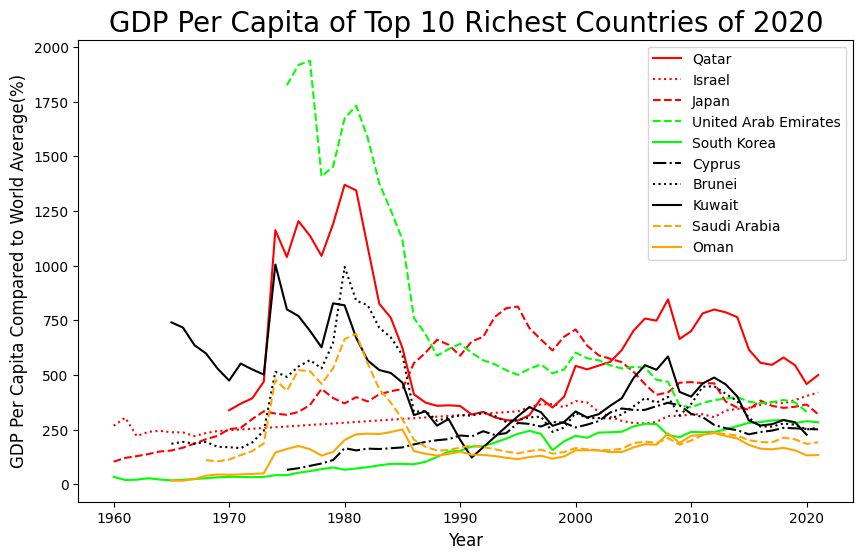

In [193]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Qatar'].values, color='r', label = 'Qatar')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Israel'].values,linestyle ='dotted', color='r', label = 'Israel')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Japan'].values,linestyle ='dashed', color='r', label = 'Japan')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['United Arab Emirates'].values,linestyle ='dashed',color='lime', label = 'United Arab Emirates')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['South Korea'].values, color='lime', label = 'South Korea')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Cyprus'].values,linestyle ='dashdot', color='black', label = 'Cyprus')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Brunei'].values, linestyle ='dotted',color='black', label = 'Brunei')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Kuwait'].values, color='black', label = 'Kuwait')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Saudi Arabia'].values,linestyle ='dashed',color='orange', label = 'Saudi Arabia')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Oman'].values, color='orange', label = 'Oman')

ax.set_title('GDP Per Capita of Top 10 Richest Countries of 2020', size=20)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='GDP Per Capita Compared to World Average(%)', size=12)
plt.legend()


The graph above shows the historical economic path of the top 10 richest countries in asia in 2020. The colors of the line graph are grouped by region and economic activity. All countries shown in this graph are at or above the world average. The oil producing countries generally have a higher GDP but have seen spikes in economic activity. The UAE had the highest GDP per capita in the mid 1970s - 1980 because of the Dubai Boom. Qatar also had a development boom in the 80s, hence the high GDP. Every country is rising.

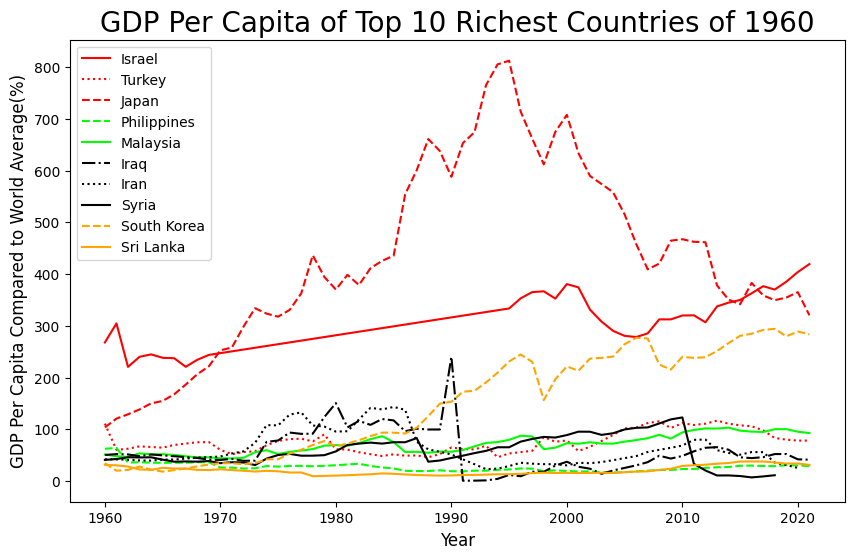

In [194]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Israel'].values, color='r', label = 'Israel')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Turkey'].values,linestyle ='dotted', color='r', label = 'Turkey')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Japan'].values,linestyle ='dashed', color='r', label = 'Japan')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Philippines'].values,linestyle ='dashed',color='lime', label = 'Philippines')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Malaysia'].values, color='lime', label = 'Malaysia')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Iraq'].values,linestyle ='dashdot', color='black', label = 'Iraq')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Iran'].values, linestyle ='dotted',color='black', label = 'Iran')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Syria'].values, color='black', label = 'Syria')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['South Korea'].values,linestyle ='dashed',color='orange', label = 'South Korea')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Sri Lanka'].values, color='orange', label = 'Sri Lanka')

ax.set_title('GDP Per Capita of Top 10 Richest Countries of 1960', size=20)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='GDP Per Capita Compared to World Average(%)', size=12)
plt.legend()

The graph above shows the historical economic path of the top 10 richest countries in asia of 1960. The colors of the line graph are grouped by region and economic activity. Unfortunately, the countries in black, green, Sri Lanka, Turkey, have remained below the world's average since 1960. Sri Lanka and the Philippines does not seem to be increasing economic output compared to the world average. Iraq was on a rise but from 1990 to 2003, the international trade embargo restricted Iraq's export activity and war debt. Japan also experienced a recession known as the Lost Decade from the mid 1990s - 2007, hence the downward trend on this graph during those years.

## 5.2 Southwest Asia (Middle East)

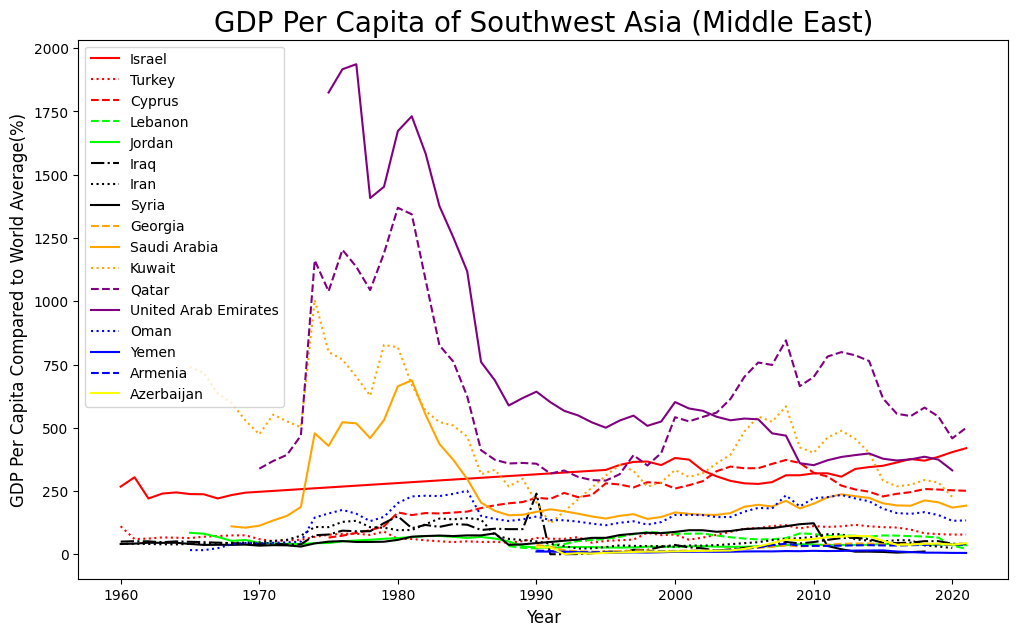

In [195]:
plt.figure(figsize=(12,7))
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Israel'].values, color='r', label = 'Israel')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Turkey'].values,linestyle ='dotted', color='r', label = 'Turkey')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Cyprus'].values,linestyle ='dashed', color='r', label = 'Cyprus')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Lebanon'].values,linestyle ='dashed',color='lime', label = 'Lebanon')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Jordan'].values, color='lime', label = 'Jordan')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Iraq'].values,linestyle ='dashdot', color='black', label = 'Iraq')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Iran'].values, linestyle ='dotted',color='black', label = 'Iran')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Syria'].values, color='black', label = 'Syria')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Georgia'].values,linestyle ='dashed',color='orange', label = 'Georgia')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Saudi Arabia'].values, color='orange', label = 'Saudi Arabia')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Kuwait'].values, linestyle='dotted', color = 'orange', label = 'Kuwait')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Qatar'].values, linestyle='dashed', color = 'purple', label = 'Qatar')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['United Arab Emirates'].values, color = 'purple', label = 'United Arab Emirates')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Oman'].values, linestyle='dotted', color = 'blue', label = 'Oman')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Yemen'].values, color = 'blue', label = 'Yemen')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Armenia'].values, linestyle='dashed', color = 'blue', label = 'Armenia')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Azerbaijan'].values, color = 'yellow', label = 'Azerbaijan')

ax.set_title('GDP Per Capita of Southwest Asia (Middle East)', size=20)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='GDP Per Capita Compared to World Average(%)', size=12)
plt.legend()

Focusing on the Middle East, war-torn countries have extreme below average GDP Per Capita according to the data. Israel has been on a steady rise since the early 1960s

## 5.3 Central Asia

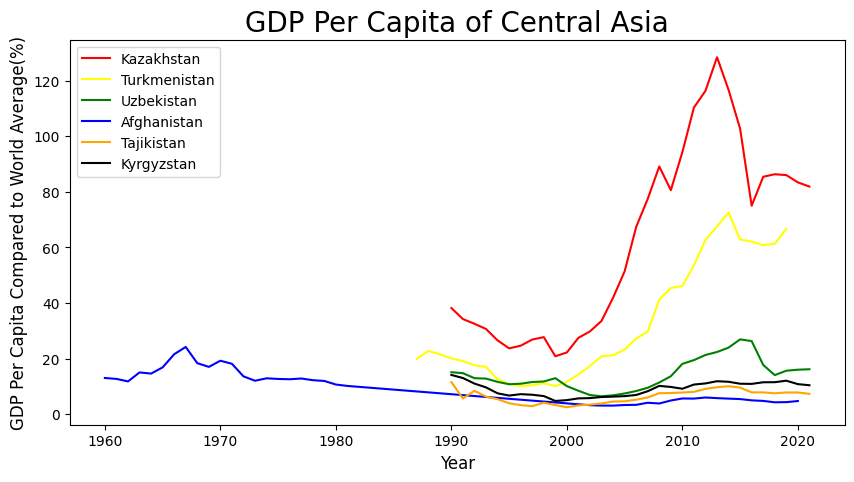

In [196]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Kazakhstan'].values, color='r', label = 'Kazakhstan')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Turkmenistan'].values, color='yellow', label = 'Turkmenistan')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Uzbekistan'].values, color='green', label = 'Uzbekistan')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Afghanistan'].values,color='blue', label = 'Afghanistan')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Tajikistan'].values, color='orange', label = 'Tajikistan')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Kyrgyzstan'].values, color='black', label = 'Kyrgyzstan')

ax.set_title('GDP Per Capita of Central Asia', size=20)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='GDP Per Capita Compared to World Average(%)', size=12)
plt.legend()

Every single country has a GDP per capita below the world's average. Every country except Afghanistan has data starting in the 90s due to the collapse of the Soviet Union.

## 5.4 South Asia

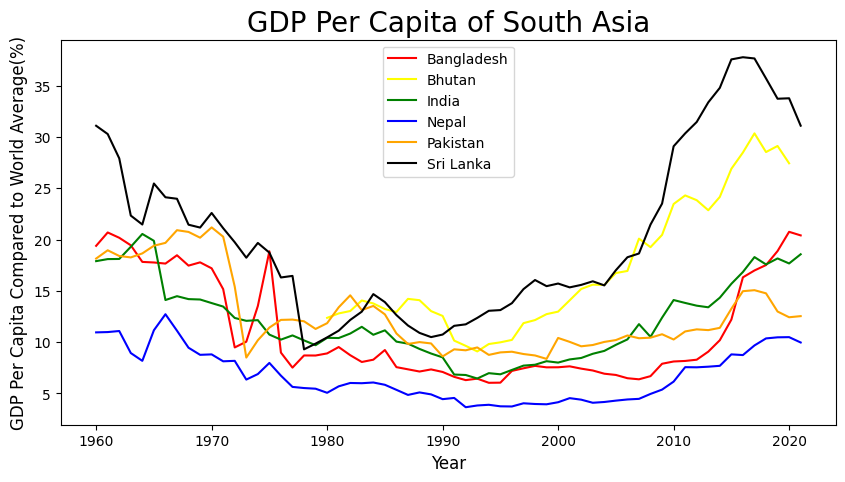

In [197]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Bangladesh'].values, color='r', label = 'Bangladesh')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Bhutan'].values, color='yellow', label = 'Bhutan')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['India'].values, color='green', label = 'India')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Nepal'].values,color='blue', label = 'Nepal')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Pakistan'].values, color='orange', label = 'Pakistan')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Sri Lanka'].values, color='black', label = 'Sri Lanka')

ax.set_title('GDP Per Capita of South Asia', size=20)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='GDP Per Capita Compared to World Average(%)', size=12)
plt.legend()

Every single South Asian country is below the world average, however, all countries have been on a rising trend since the 1990s. The sharp decline in Sri Lanka's GDP Per Capita is due to the Sri Lankan Economic Crisis. The GDP Per Capita for Sri Lanka has been declining since 2015. All countries shown have had GDP per capita decline around 2019 due to the COVID-19 Pandemic

## 5.5 East Asia

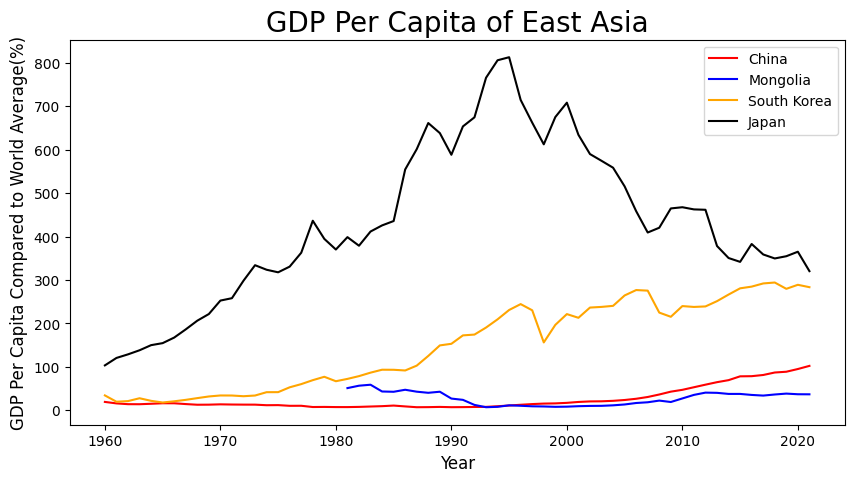

In [198]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['China'].values, color='r', label = 'China')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Mongolia'].values, color='blue', label = 'Mongolia')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['South Korea'].values, color='orange', label = 'South Korea')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Japan'].values, color='black', label = 'Japan')

ax.set_title('GDP Per Capita of East Asia', size=20)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='GDP Per Capita Compared to World Average(%)', size=12)
plt.legend()

Japan's economy has been declining since the mid 1990s due to a severe decrease in consumer consumption and exports; Japan's aging population plays a major role. South Korea has been steadily rising as well as China too. Mongolia, however, has stayed relatively stable but below the world's average.

## 5.6 Southeast Asia

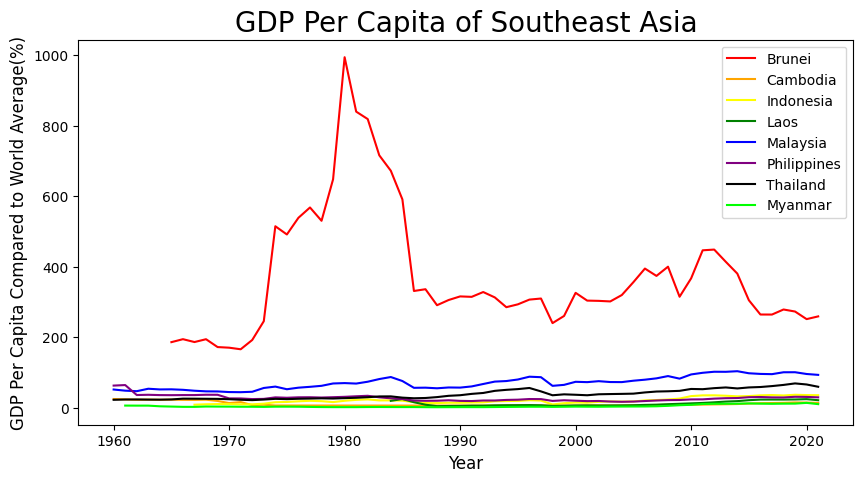

In [199]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Brunei'].values, color='red', label = 'Brunei')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Cambodia'].values, color='orange', label = 'Cambodia')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Indonesia'].values, color='yellow', label = 'Indonesia')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Laos'].values, color='green', label = 'Laos')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Malaysia'].values, color='blue', label = 'Malaysia')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Philippines'].values, color='purple', label = 'Philippines')

ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Thailand'].values, color='black', label = 'Thailand')
ax = sns.lineplot(data=Graph, x=Graph['Year'], y=Graph['Myanmar'].values, color='lime', label = 'Myanmar')

ax.set_title('GDP Per Capita of Southeast Asia', size=20)
ax.set_xlabel(xlabel='Year', size=12)
ax.set_ylabel(ylabel='GDP Per Capita Compared to World Average(%)', size=12)
plt.legend()

All country except Brunei have remained close but below the world's average. Brunei has the highest GDP Per Capita in this graph due to its oil and gas reserves.

# 6. Maps of GDP Per Capita in Asia

Text(0.5, 1.0, 'GDP per capita in 2020 compared to the World Average (Percentiles)')

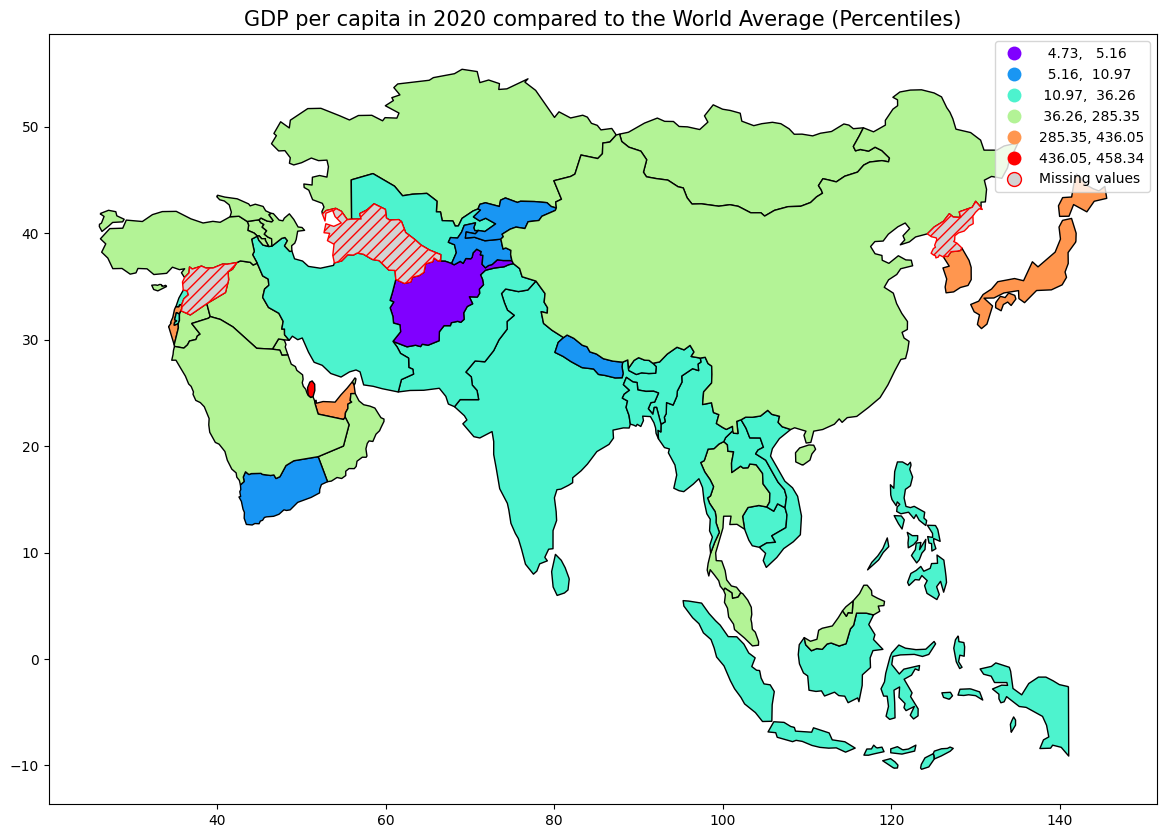

In [205]:
#Source :https://geopandas.org/en/stable/docs/user_guide/mapping.html
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

gdp_world.insert(0, 'geometry', gdp['geometry'])
gdp_world.insert(0, 'iso_a3', gdp['iso_a3'])

GDP_2020 = gdp_world[['country','iso_a3','2020']]

merge=pd.merge(world,GDP_2020,on='iso_a3')

merge.plot(column='2020', scheme="percentiles",
           figsize=(15, 10),
           legend=True,cmap='rainbow', edgecolor = 'black',
           missing_kwds={"color": "lightgrey","edgecolor": "red",
                         "hatch": "///","label": "Missing values",},)
plt.title('GDP per capita in 2020 compared to the World Average (Percentiles)',fontsize=15)

In [206]:
R_2021 = gdp_world.sort_values(by = ['2020'], ascending=True, inplace=False).reset_index().head(10)
R_2021 = R_2021['country']
R_2021

0    Afghanistan
1          Yemen
2     Tajikistan
3          Nepal
4     Kyrgyzstan
5       Pakistan
6    Timor-Leste
7        Myanmar
8       Cambodia
9     Uzbekistan
Name: country, dtype: object

The map above shows the GDP Per Capita in Asia relative to the world average, with the colors based off percentiles. Afghanistan in Central Asia is the poorest country.

Text(0.5, 1.0, 'GDP per capita in 2020 compared to the World Average (Quantiles)')

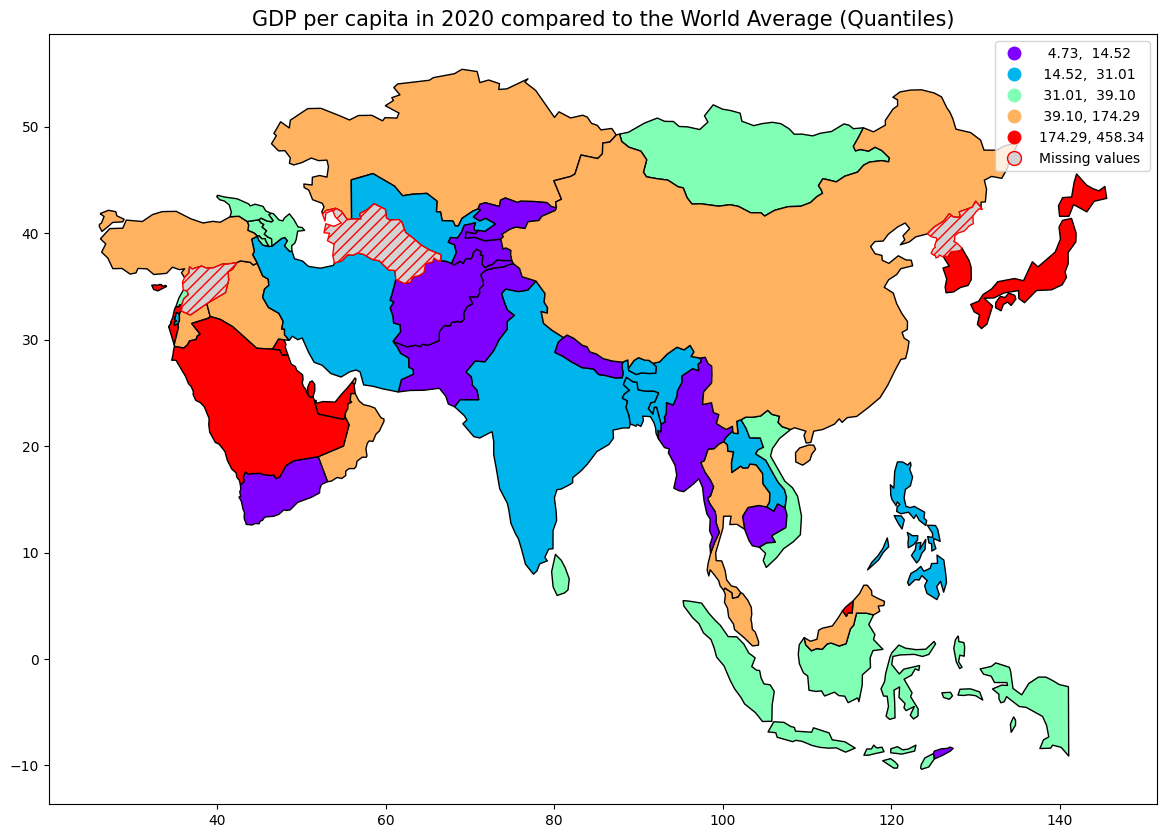

In [209]:
merge=pd.merge(world, GDP_2020,on='iso_a3')
merge.plot(column='2020', scheme="quantiles",
           figsize=(15, 10),
           legend=True,cmap='rainbow', edgecolor = 'black',
           missing_kwds={"color": "lightgrey","edgecolor": "red",
                         "hatch": "///","label": "Missing values",},)
plt.title('GDP per capita in 2020 compared to the World Average (Quantiles)',fontsize=15)

From this graph, you can see that the richest countries are those with oil/gas reserves or cultural power.

# 7. Barplot

In [218]:
# #Obtaining 30 year differences for the bar plots.
# GDP_1990_1960 = gdp_world[['country']]
# GDP_1990_1960['1990'] = gdp_world['1990'] - gdp_world['1960']
# GDP_2021_1990 = gdp_world[['country']]
# GDP_2021_1990['2021'] = gdp_world['2021'] - gdp_world['1990']

In [237]:
#Sorting values and dropping missing values to make the bar plot easier to view.
GDP_1990_1960.sort_values(by='1990',ascending=True, inplace=True)
GDP_1990_1960.dropna(inplace=True)

GDP_2021_1990.sort_values(by='2021',ascending=True, inplace=True)
GDP_2021_1990.dropna(inplace=True)

In [238]:
#Extracting data which includes greater than and less than a 10 percentage point change.
GDP_2021_1990_aa=GDP_2021_1990.loc[(GDP_2021_1990['2021']<-10)]
GDP_2021_1990_ab=GDP_2021_1990.loc[(GDP_2021_1990['2021']>10)]
GDP_2021_1990_a=pd.concat([GDP_2021_1990_aa,GDP_2021_1990_ab])

Text(0, 0.5, 'Change of GDP per capita compared to world average (%)')

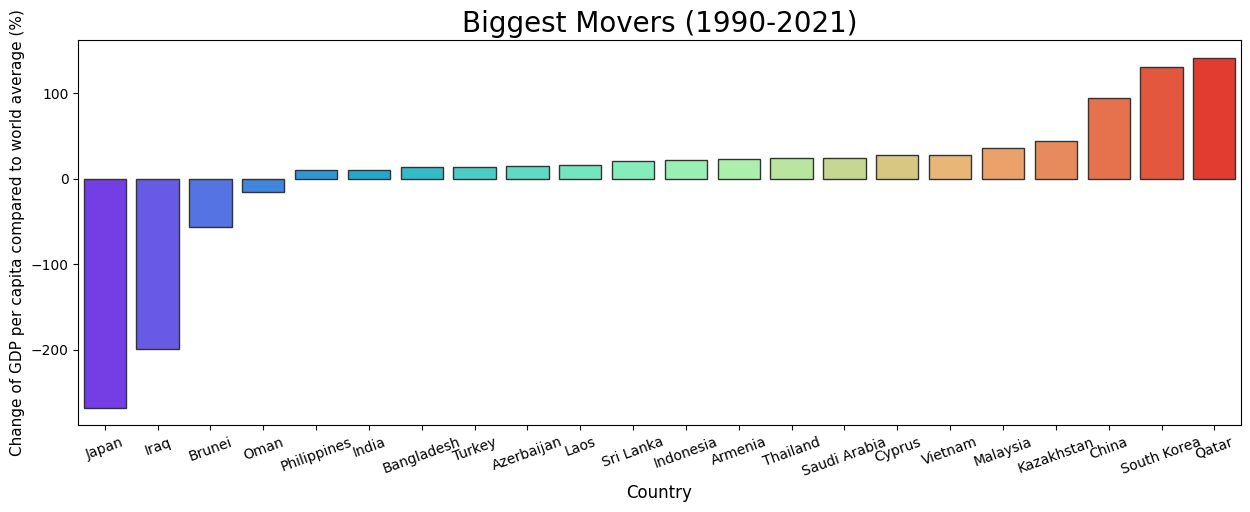

In [239]:
plt.figure(figsize=(15,5))

ax = sns.barplot(data=GDP_2021_1990_a,y=GDP_2021_1990_a['2021'], x=GDP_2021_1990_a['country'],edgecolor=".2",palette='rainbow',dodge=False)
plt.xticks(rotation=20)
ax.set_title('Biggest Movers (1990-2021)', size=20)
ax.set_xlabel(xlabel='Country', size=12)
ax.set_ylabel(ylabel='Change of GDP per capita compared to world average (%)', size=11)

The above bar plots shows Asian countries with changes to per capita output relative to the world average above and below 10 percentage points in the period from 1990 to 2021. Qatar saw the most improvement, driven by oil exports, while Japan has the largest decline for this period.